In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
frame = pd.read_csv('10x10, 10^5 images')
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,1,1,0,0,0,1,0,1,1,...,1,1,1,0,0,0,0,1,1,8
1,1,0,1,1,1,0,0,1,1,1,...,1,1,0,1,1,1,0,1,0,6
2,1,1,1,1,0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,0,6
3,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,1,1,7
4,1,0,1,1,1,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,10


mean y 10.22975
median y 10.0
max y 24
min y 1


(array([  2.20000000e+01,   1.40000000e+02,   5.76000000e+02,
          1.54400000e+03,   3.13900000e+03,   5.30900000e+03,
          8.09100000e+03,   1.06140000e+04,   1.25770000e+04,
          1.28140000e+04,   1.21150000e+04,   1.05140000e+04,
          8.27000000e+03,   5.73600000e+03,   3.83000000e+03,
          2.34200000e+03,   1.24800000e+03,   6.24000000e+02,
          2.93000000e+02,   1.30000000e+02,   4.30000000e+01,
          1.80000000e+01,   1.10000000e+01]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.]),
 <a list of 23 Patch objects>)

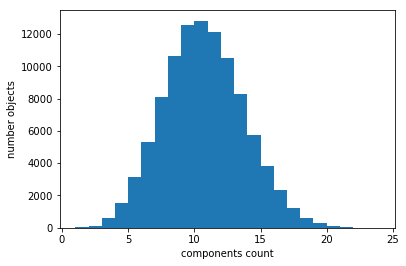

In [35]:
print('mean y', frame['100'].mean())
print('median y', frame['100'].median())
print('max y', frame['100'].max())
print('min y', frame['100'].min())
plt.xlabel('components count')
plt.ylabel('number objects')
plt.hist(frame['100'], bins=23)
# Видим что распределение числа компонент связности - нормальное!

In [4]:
# Собственно если совсем ничего не делать
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('mse', mean_squared_error(frame['100'], [frame['100'].mean()] * frame.shape[0]))
print('mae', mean_absolute_error(frame['100'], [frame['100'].median()] * frame.shape[0]))

mse 9.2851049375
mae 2.42221


In [5]:
X = frame.drop('100', axis = 1)
y = frame['100']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Maybe KNN

In [12]:
#Собственно если сделать чуть-чуть
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

%%time
knn = KNeighborsRegressor()
param_grid_knn = {'n_neighbors': [1, 3, 5, 10, 30, 100, 1000], 'p': [1, 1.5, 2, 3]}
param_grid_knn_mini = {'n_neighbors': [5], 'p': [1]}
optimizer = GridSearchCV(knn, param_grid_mini, scoring='neg_mean_squared_error', n_jobs=-1, cv = 2)
optimizer.fit(X_train, y_train)

In [9]:
%%time
knn = KNeighborsRegressor(n_neighbors=5, p=1)
knn.fit(X_train, y_train)

CPU times: user 10 s, sys: 8 ms, total: 10 s
Wall time: 10 s


In [11]:
%%time
print(mean_squared_error(y_test[:1000], knn.predict(X_test[:1000])))
# Здесь почувствовалось, что KNN очень даже долгий на больших выборках, особенно его predict

7.1814
CPU times: user 23.1 s, sys: 4 ms, total: 23.1 s
Wall time: 23.2 s


# Линейные методы

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid_ridge = {'alpha': [0, 0.5, 0.75, 1, 1.5, 5, 10, 50]}
optimizer = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', n_jobs=-1, cv = 3)

In [88]:
%%time
optimizer.fit(X_train, y_train)

CPU times: user 3.12 s, sys: 128 ms, total: 3.25 s
Wall time: 3.9 s


GridSearchCV(cv=3, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': [0, 0.5, 0.75, 1, 1.5, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [89]:
print('ridge mse test', mean_squared_error(y_test, optimizer.predict(X_test)))

5.43477903517


In [94]:
best_ridge = optimizer.best_estimator_
coefs = best_ridge.coef_
print('b = ', best_ridge.predict(np.zeros((1, 100)))[0])

b =  28.6726491708


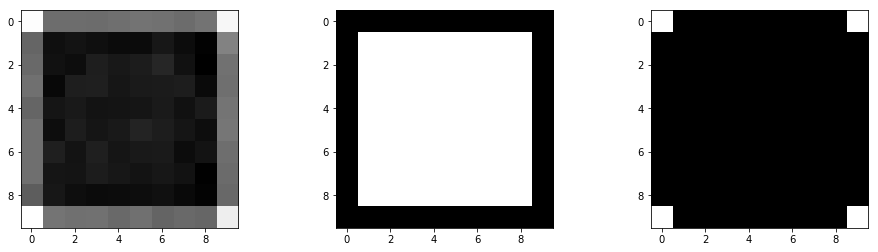

In [78]:
#Это картинка важности клеток в модели, интересно, что от угловых клеток мало что зависит
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.imshow(coefs.reshape(10, 10), cmap='gray', interpolation='nearest') 
plt.subplot(1, 3, 2)
plt.imshow(np.array([np.abs(x) > 0.3 for x in coefs.reshape(10, 10)]), cmap='gray', interpolation='nearest') 
plt.subplot(1, 3, 3)
plt.imshow(np.array([x > 0 for x in coefs.reshape(10, 10)]), cmap='gray', interpolation='nearest') 

    Из коэффициентов модели можно сделать следующие выводы:
  
   1) Угловые клетки почти не влияют на кол-во компонент, действительно это может быть только в том случае, если 3 клетки около неё черные - что не часто бывает. Причём при угловых коэффициенты больше 0 и близки к 1/8, что невероятно логично, ведь если там белая клетка (1), то с вероятностью 1/8 она даст прирост
     
   2) Во всех остальных же клетках коэффициенты меньше 0, причём по границе они не такие большие порядка -0.25, а в центре катринки около -0.42. Это говорит о том, что если клетка белая, то она скорее уменьшить кол-во компонент связности, в связи с тем, что свяжет близлежайшие к ней компоненты, причём в центре картинки сделать это более вероятно
   
   3) Также очевидно, что все признаки важны и нет смысла использовать Lasso (я попробовал лучше не стало)
   
   4) Также из-за того, что данные генерировались случайно, то модель и недумает предсказывать числа большие 30, так b = 28.6, и увеличится итоговое предсказание может макисмум до 29, благодаря положительным коэффициентам в угловых клетках.

## Трансформация признаков

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
transform = PolynomialFeatures(2)

In [21]:
%%time
X_train_poly = transform.fit_transform(X_train) #because very much memory need
X_test_poly = transform.transform(X_test)
print(X_train_poly.shape)

(80000, 5151)
CPU times: user 5.98 s, sys: 332 ms, total: 6.31 s
Wall time: 6.32 s


In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid_lasso = {'alpha': [0.007, 0.01, 0.02]}
optimizer = GridSearchCV(lasso, param_grid_lasso, scoring='neg_mean_squared_error', cv = 3)

In [36]:
%%time
optimizer.fit(X_train_poly, y_train)

CPU times: user 5min 3s, sys: 13.9 s, total: 5min 17s
Wall time: 3min 31s


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.007, 0.01, 0.02]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [37]:
best_lasso = optimizer.best_estimator_

In [38]:
best_lasso.alpha

0.007

In [39]:
best_lasso.coef_[best_lasso.coef_ != 0].shape[0]

756

In [64]:
# Выдаёт имена используемых признаков
np.array(transform.get_feature_names(frame.columns))[[idx for idx, x in list(enumerate([x for x in best_lasso.coef_])) if x != 0]] 

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '19', '20',
       '29', '30', '39', '40', '49', '50', '59', '60', '69', '70', '79',
       '80', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98',
       '99', '0^2', '0 1', '0 3', '0 6', '0 9', '0 10', '0 11', '0 20',
       '0 30', '0 40', '0 49', '0 69', '0 79', '0 91', '0 92', '0 93',
       '0 96', '0 97', '0 98', '1^2', '1 2', '1 3', '1 5', '1 9', '1 10',
       '1 11', '1 12', '1 20', '1 32', '1 39', '1 60', '1 69', '1 70',
       '1 79', '1 80', '1 89', '1 91', '1 94', '1 95', '1 96', '1 98',
       '2^2', '2 3', '2 4', '2 5', '2 6', '2 7', '2 8', '2 10', '2 11',
       '2 12', '2 13', '2 19', '2 20', '2 29', '2 39', '2 40', '2 49',
       '2 59', '2 60', '2 70', '2 80', '2 90', '2 91', '2 92', '2 96',
       '2 99', '3^2', '3 4', '3 5', '3 7', '3 10', '3 12', '3 13', '3 14',
       '3 19', '3 22', '3 24', '3 29', '3 39', '3 49', '3 50', '3 69',
       '3 79', '3 89', '3 90', '3 95', '4^2', '4 5', '4 6', 

In [40]:
print(mean_squared_error(y_test, optimizer.predict(X_test_poly)))

1.84834385374


Удивительный результат, получается, что с полиномиальными фичами можно добиться очень достойного результата 1.85. К сожалению, его теперь не так просто интерпретировать(

# Композиции решающих деревьев

In [14]:
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [21]:
%%time
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=13)
rf.fit(X_train, y_train)
print('rf mse train:', mean_squared_error(y_train, rf.predict(X_train)))
print('rf mse test:', mean_squared_error(y_test, rf.predict(X_test)))

rf mse train: 2.09988784314
rf mse test: 6.56881456259
CPU times: user 2min 50s, sys: 268 ms, total: 2min 51s
Wall time: 52.5 s


In [27]:
%%time
xgb = xgboost.XGBRegressor(n_estimators=5000)
xgb.fit(X_train, y_train)
print('xgb mse train:', mean_squared_error(y_train, xgb.predict(X_train)))
print('xgb mse test:', mean_squared_error(y_test, xgb.predict(X_test)))

xgb mse train: 0.569232062468
xgb mse test: 0.642547103914
CPU times: user 21min 57s, sys: 2.99 s, total: 22min
Wall time: 6min 36s


In [53]:
print(xgb.predict(X_test)[:3], y_test[:3].values)

[ 3.67477584  8.71294022  8.7796793 ] [4 8 8]


In [64]:
print('predict white', xgb.predict(pd.DataFrame([[0] * 100], columns=X_test.columns))[0])
print('predict black', xgb.predict(pd.DataFrame([[1] * 100], columns=X_test.columns))[0])

predict white 6.18764
predict black -7.94501


    Результаты:

1) Невероятный результат от xgboost, ему потребовалось много деревьев, но увиденное поражает, средняя квадратичная ошибка на тесте 0.65! Это очень круто. Сложно объяснить почему xgboost дал такой хороший результат. 

2) Но также заметим, что если ему подать полнстью белую или чёрную картинку, то он будет очень далёк от правильного ответа 1 и 0 соответственно. Во втором случае он вообще даёт число меньшее 0. Но и не удивительно, такие данные очень сложно получить если красить каждую клетку в черный или белый равновероятно(как это было при генерации этих данных) это были бы скорее аномалии в данной выборке. Модель просто не была приспособлена к таким выборкам. Поэтому стоит понимать, что xgboost не научился считать компоненты связности для любой раскраски, а лишь при раскрасках полученых таким же образом как и обучающая выборка.

3) Случайный лес мне вообще не удалось вывести на что-то лучшее чем линейный модели в лоб. Он очень быстро переобучался, из-за того что очень много важных признаков